# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Utils

In [ ]:
def show_class_balance(df, target):
  counts = df[target].value_counts()
  ratios = counts / len(df)

  plt.figure()
  ax = counts.plot.bar()
  plt.title("Class distribution")
  plt.xlabel("Class")
  plt.ylabel("Count")

  for i, v in enumerate(counts):
    ax.text(i, v, f"{ratios.iloc[i]*100:.1f}%",
      ha="center", va="bottom")

  plt.tight_layout()
  plt.show()

# Loading Data

In [ ]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
target = "Diabetes_binary"

In [ ]:
int_features = df.columns.tolist()
int_features.remove("BMI")
int_features

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [ ]:
df[int_features] = df[int_features].astype(int)

# Target Class Balance

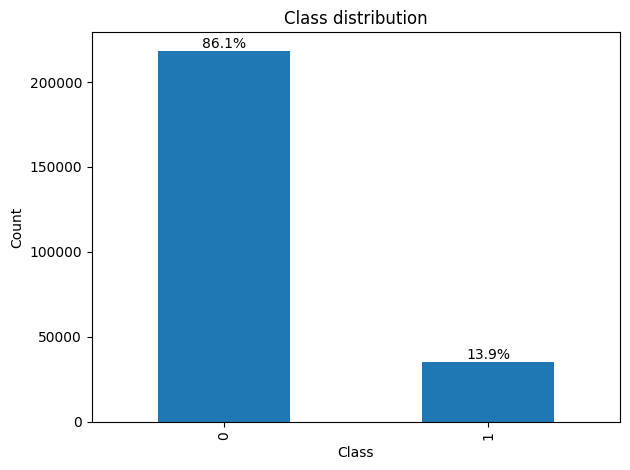

In [ ]:
show_class_balance(df, target)

# Splitting data

In [ ]:
df_offline, df_online = train_test_split(df, test_size=0.2, shuffle=True)

## Class balance in offline data

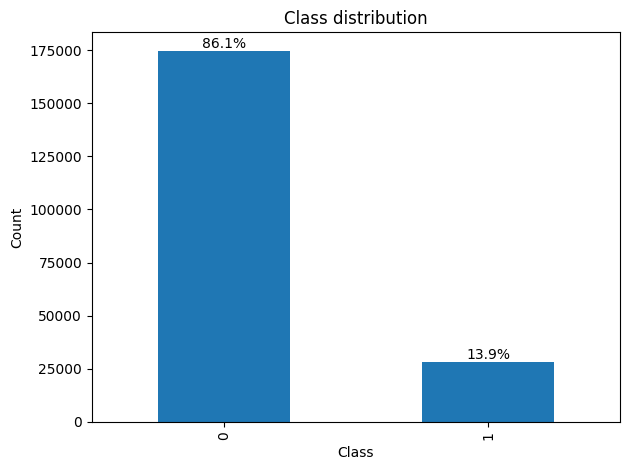

In [ ]:
show_class_balance(df_offline, target)

## Class balance in online data

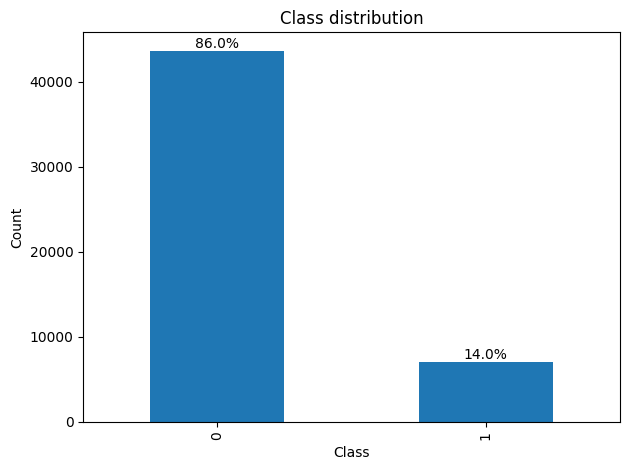

In [ ]:
show_class_balance(df_online, target)

Само со стандардната поделба на податочното множество се задржува соодносот на класите, па не се потребни други мерки за задржување на соодносот на класите во offline и online податоците.

# Saving data

In [ ]:
df_offline.to_csv("offline.csv", index=False)

In [ ]:
df_online.to_csv("online.csv", index=False)